# **MTH377: *Convex Optimization Assessment-1***

In [1]:
import warnings
warnings.filterwarnings('ignore')

## **Problem: 1 (5 Points)**

This problem deals with the Taylor approximation of a function $f(x) = x^2 + \log{x}$ around the point $x_0 = 1$.

The Taylor approximation of $f(x)$ around $x_0 = 1$ is given by:

$$\begin{align*}
    f(x) &\approx f(1) + f'(1)(x - 1) + \frac{f''(1)}{2!}(x - 1)^2 + \cdots \\
    &= \sum_{n = 0}^{\infty} \frac{f^{(n)}(1)}{n!}(x - 1)^n
\end{align*}$$

where $f'(x)$ and $f''(x)$ are the first and second derivatives of $f(x)$ respectively, and $f^{(n)}(x)$ represents the $n$-th derivative of $f(x)$.

The following are the first and second derivatives of $f(x)$:

$$\begin{align*}
    f'(x) &= 2x + \frac{1}{x} \\
    f''(x) &= 2 - \frac{1}{x^2}
\end{align*}$$

Hence, we have:

$$\begin{align*}
    f(1) &= 1^2 + \log{1} = 1 \\
    f'(1) &= 2(1) + \frac{1}{1} = 3 \\
    f''(1) &= 2 - \frac{1}{1^2} = 1
\end{align*}$$

Given that the linear approximation or linear Taylor polynomial of $f(x)$ is $L(x)$ and the quadratic approximation or quadratic Taylor polynomial of $f(x)$ is $Q(x)$, then:

$$\begin{align*}
    L(x) &= f(1) + f'(1)(x - 1) \\
         &= 1 + 3(x - 1) \\
         &= 3x - 2\\
    Q(x) &= f(1) + f'(1)(x - 1) + \frac{f''(1)}{2!}(x - 1)^2 \\
         &= 1 + 3(x - 1) + \frac{1}{2}(x - 1)^2 \\
         &= \frac{x^2}{2} + 2x - \frac{3}{2}
\end{align*}$$

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### **Part (a)**

Plot $f(x)$, $L(x)$, and $Q(x)$ on the same graph for $x \in [0, 2]$.

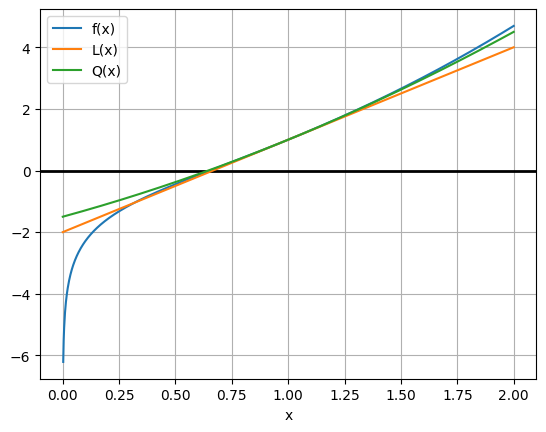

In [3]:
def f(x: np.ndarray) -> np.ndarray:
    return x**2 + np.log(x)

def L(x: np.ndarray) -> np.ndarray:
    return 3*x - 2

def Q(x: np.ndarray) -> np.ndarray:
    return x**2/2 + 2*x - 3/2

x = np.linspace(0, 2, 1000)
plt.axhline(y=0, color="black", linewidth=2)
plt.plot(x, f(x), linewidth=1.5, label="f(x)")
plt.plot(x, L(x), linewidth=1.5, label="L(x)")
plt.plot(x, Q(x), linewidth=1.5, label="Q(x)")
plt.xlabel("x")
plt.grid(True)
plt.legend()
plt.show()

### **Part (b)**

Given that the errors associated with the linear and quadratic approximations are $e_L(x)$ and $e_Q(x)$ respectively, then:

$$\begin{align*}
    e_L(x) &= f(x) - L(x) \\
           &= x^2 - 3x + \log{x} + 2 \\
    e_Q(x) &= f(x) - Q(x) \\
           &= \frac{x^2}{2} - 2x + \log{x} + \frac{3}{2}
\end{align*}$$


Note that $e_L(x)$ and $e_Q(x)$ are discontinuous at $x = 0$ and $x = 1$. So, at $x = 0$: 

$$ \lim_{x \to 0} \left( \frac{e_L(x)}{x-1} \right) \ \text{ and } \ \lim_{x \to 0} \left( \frac{e_Q(x)}{(x-1)^2} \right)$$

diverge, as $\log{x}$ diverges in the limit as $x \to 0$.

At $x = 1$, using L'Hôpital's rule:

$$\begin{align*} 
    \lim_{x \to 1} \left( \frac{e_L(x)}{x-1} \right) &= \frac{\frac{d}{dx}(x^2 - 3x + \log{x} + 2)}{\frac{d}{dx}(x - 1)} \\
    &= 2x - 3 + \frac{1}{x} \\
    &= 2(1) - 3 + \frac{1}{1} = 0 \\

    \lim_{x \to 1} \left( \frac{e_Q(x)}{(x-1)^2} \right) &= \frac{\frac{d}{dx}(\frac{x^2}{2} - 2x + \log{x} + \frac{3}{2})}{\frac{d}{dx}((x - 1)^2)} \\
    &= \frac{x - 2 + \frac{1}{x}}{2(x - 1)} \\
    &= \frac{\frac{d}{dx}(x - 2 + \frac{1}{x})}{\frac{d}{dx}(2(x- 1))} \\
    &= \frac{x^2 - 1}{2x^2} \\
    &= \frac{1^2 - 1}{2(1)^2} =  0
\end{align*}$$

We plot $\frac{e_L(x)}{x-1}$ and $\frac{e_Q(x)}{(x-1)^2}$ on the same graph for $x \in [0, 2]$.

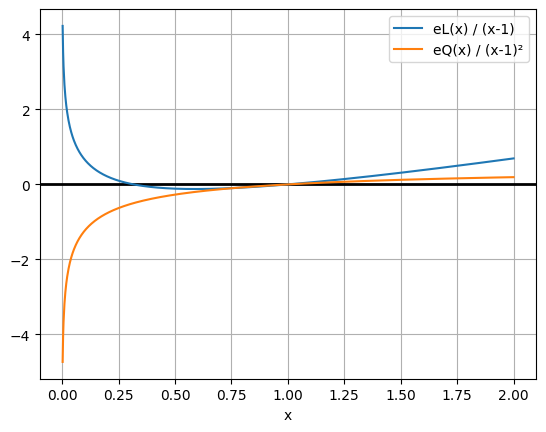

In [4]:
def eL(x: np.ndarray) -> np.ndarray:
    return (f(x) - L(x))

def eQ(x: np.ndarray) -> np.ndarray:
    return (f(x) - Q(x))

x = np.linspace(0, 2, 1000)
plt.axhline(y=0, color="black", linewidth=2)
plt.plot(x, eL(x)/(x-1), linewidth=1.5, label="eL(x) / (x-1)")
plt.plot(x, eQ(x)/np.square(x-1), linewidth=1.5, label="eQ(x) / (x-1)²")
plt.xlabel("x")
plt.grid(True)
plt.legend()
plt.show()

## **Problem: 2 (6 Points)**

This problem deals with computing the unconstrained minimum of the given function $f(x, y)$ using the Combination Descent Algorithm with initial point $(1, 1)$.

$$\min_{x, y} f(x, y) = (x^2 - 3y^2)^2 + \sin^2{(x^2 + y^2)}$$

The Combination Descent Algorithm covered in the lecture notes titled [Algorithms for Unconstrained Optimization](https://drive.google.com/file/d/14RQZJA7KqXajztzdQe57etH72FMr0XUl/view) has been followed to solve this problem.

The function $f$ in the code is defined as follows, wherein the vector $\mathbf{x} = \langle \mathbf{x_0}, \mathbf{x_1} \rangle$ represents the point $(x, y)$:

$$f(\mathbf{x}) = (\mathbf{x_0}^2 - 3\mathbf{x_1}^2)^2 + \sin^2{(\mathbf{x_0}^2 + \mathbf{x_1}^2)}$$

Observe that the function $f$ is a sum of squares, and hence, the theoretical minimum of $f(\mathbf{x}) = 0$, which may occur at multiple points.

The Combination Descent Algorithm is fine-tuned using the following parameters to find different minima of $f$:

- The descent parameter, $\alpha \in (0, 0.5)$
- The reduction factor, $\beta \in (0, 1)$
- The tolerance, $\eta \in (0, 1)$

We vary $\alpha$ and $\beta$ with different tolerances to find different minima of $f$. The following table shows some runs of the algorithm starting at $(1, 1)$ for different values of the parameters:

| $\alpha$ | $\beta$ | $\eta$    | $\mathbf{x}$                                               | $f(\mathbf{x})$            | Avgerage time taken |
|:--------:|:-------:|:---------:|:----------------------------------------------------------:|:--------------------------:|:-------------------:|
| $0.10$   | $0.90$  | $10^{-10}$| $\langle 2.17, -1.25 \rangle$                              | $1.84 \times 10^{-29}$     | $0.10 \ s$          |
| $0.40$   | $0.50$  | $10^{-10}$| $\langle 3.76, 2.17 \rangle$                               | $3.69 \times 10^{-30}$     | $0.10 \ s$          |
| $0.10$   | $0.10$  | $10^{-10}$| $\langle 1.53, -0.08 \rangle$                              | $2.12 \times 10^{-31}$     | $0.10 \ s$          |
| $0.15$   | $0.20$  | $10^{-15}$| $\langle -2.7 \times 10^{-6}, 2.2 \times 10^{-6} \rangle$  | $2.24 \times 10^{-22}$     | $0.20 \ s$          |
| $0.10$   | $0.05$  | $10^{-20}$| $\langle 9.3 \times 10^{-8}, -3.0 \times 10^{-8} \rangle$  | $1.26 \times 10^{-28}$     | $0.20 \ s$          |
| $0.40$   | $0.20$  | $10^{-25}$| $\langle -2.3 \times 10^{-9}, -1.1 \times 10^{-9} \rangle$ | $5.07 \times 10^{-35}$     | $0.30 \ s$          |

Note that the values of $f(\mathbf{x})$ are extremely close to $0$ and choosing finer and finer floats for $\alpha$, $\beta$, and $\eta$ will lead to better approximations of the minimum of $f$, at the cost of increased computation time.

In [5]:
import numpy as np
import numpy.linalg as la
import numdifftools as nd
from typing import Callable

# Type Aliases
Vector = list[float, float]
Point = list[float, float]
Function = Callable[[Point], float]

In [6]:
# Given function f
def f(x: Point) -> float:
    return np.square(x[0]**2 - 3*x[1]**2) + np.square(np.sin(x[0]**2 + x[1]**2))


# Line Search Algorithm
def line_search(F: Function, x: Point, d: Vector, alpha: float, beta: float) -> float:
    """
    Line Search Algorithm to find the optimal step size.
    :param F: the function to find the minimum of
    :param x: the current point
    :param d: the direction to move in
    :param alpha: the descent parameter
    :param beta: the reduction factor
    :return t: the optimal step size
    """

    t = 1
    while F(x) - F(x + t*d) < alpha*np.dot(nd.Gradient(F)(x), t*d):
        t = beta * t
    return t


# Combination Descent Algorithm
def combination_descent(F: Function, x0: Point, alpha: float, beta: float, eta: float) -> list[Point]:
    """
    CDA is a combination of Gradient Descent and Newton's Descent.
    :param F: the function to find the minimum of
    :param x0: the initial point/guess to start from
    :param alpha: the descent parameter for line search
    :param beta: the reduction factor for line search
    :param eta: the tolerance
    :return points: the list of points that the algorithm generates (the last point is the required minimum)
    """

    points: list[Point] = []
    x = x0
    while np.linalg.norm(grad := nd.Gradient(F)(x)) > eta:
        points.append(x)
        hessian = nd.Hessian(F)(x)
        d = (la.inv(hessian) @ (-grad)) if np.all(la.eigvals(hessian) > 0) else (-grad)
        t = line_search(F, x, d, alpha, beta)
        x = x + t*d
    points.append(x)
    return points


# Given Initial Point
x0: Point = [1, 1]
points = combination_descent(f, x0, alpha=0.40, beta=0.20, eta=1e-25)
print("The minimum of f is xₘ =", minimum := points[-1])
print("f(xₘ) =", f(minimum))

The minimum of f is xₘ = [-2.37043751e-09  1.12253568e-09]
f(xₘ) = 5.070234400531002e-35


The following code snippet visualizes the run of the algorithm using the points generated by the code snippet above.

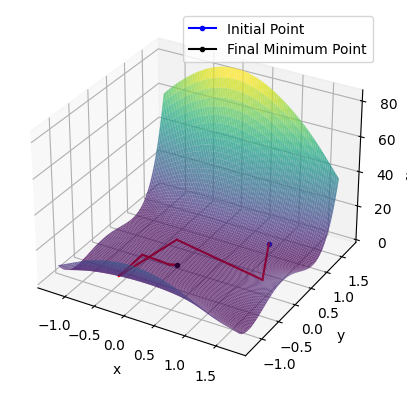

In [7]:
ax = plt.axes(projection="3d")
x = np.linspace(-1.25, 1.75, 100)
y = np.linspace(-1.25, 1.75, 100)

X, Y = np.meshgrid(x, y)
Z = np.square(X**2 - 3*Y**2) + np.square(np.sin(X**2 + Y**2))

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="viridis", edgecolor="none", alpha=0.75)
ax.plot3D([points[0][0]], [points[0][1]], [f(points[0])], color="blue", marker=".", label="Initial Point")

for i in range(len(points)-1):
    p1, p2 = points[i], points[i+1]
    ax.plot3D([p1[0], p2[0]], [p1[1], p2[1]], [f(p1), f(p2)], color="red", linewidth=1.5)

ax.plot3D([points[-1][0]], [points[-1][1]], [f(points[-1])], color="black", marker=".", label="Final Minimum Point")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
plt.legend()
plt.show()

## **Problem: 3 (9 Points)**

This problem requires us to find the analytical center of the set $S \subseteq \mathbb{R}^2$ such that:

$$S = \{ \mathbf{x} \in \mathbb{R}^2 \ | \ g_j(\mathbf{x}) \ge 0 \ \forall  \ j \in \{ 1, 2, 3 \} \}$$

for the following linear inequality constraints:

$$\begin{align*}
    g_1(x_1, x_2) &= 2x_2 - x_1 \\
    g_2(x_1, x_2) &= 2x_1 - x_2 \\
    g_3(x_1, x_2) &= 1 - x_1 - x_2
\end{align*}$$

Hence, the potential function associated with set $S$ is:

$$\begin{align*}
    \Psi(\mathbf{x}) &= - \sum_{j = 1}^3 \log{g_j(\mathbf{x})} \\
    &= - (\log{g_1(\mathbf{x})} + \log{g_2(\mathbf{x})} + \log{g_3(\mathbf{x})}) \\ 
    &= - \log{(g_1(\mathbf{x}) \cdot g_2(\mathbf{x}) \cdot g_3(\mathbf{x}))} \\
    &= \log{\left( \frac{1}{g_1(\mathbf{x}) \cdot g_2(\mathbf{x}) \cdot g_3(\mathbf{x})} \right)} = \log{(f(\mathbf{x}))} \ \text{(say)} \\
\end{align*}$$

The analytical center of the set $S$ is given by the vector $\mathbf{x}$ that minimizes the potential function, i.e. we need to find the point $\mathbf{x}$ such that:

$$\min_{\mathbf{x}} \Psi(\mathbf{x}) = \log{\left( \frac{1}{g_1(\mathbf{x}) \cdot g_2(\mathbf{x}) \cdot g_3(\mathbf{x})} \right)} = \log{(f(\mathbf{x}))}$$

Since $\log{(x)}$ is a monotonically increasing function, minimizing $\log{(p(x))}$ is equivalent to minimizing $p(x)$. So, to minimize $\Psi(\mathbf{x})$, we need to find the minimum of $f(\mathbf{x})$.

Note the values of $g_1$, $g_2$, and $g_3$ at the starting point $(0.25, 0.25)$:

$$\begin{align*}
    g_1(0.25, 0.25) &= 2 (0.25) - 0.25 &= 0.25 &\geq 0 \\
    g_2(0.25, 0.25) &= 2 (0.25) - 0.25 &= 0.25 &\geq 0 \\
    g_3(0.25, 0.25) &= 1 - 0.25 - 0.25 &= 0.50 &\geq 0
\end{align*}$$

Since all the inequalities are satisfied, the point $(0.25, 0.25) \in S$ is a feasible point to start the minimization algorithm. The Combination Descent Algorithm (as explained in Problem 2 above) should ideally make sure that the inequalities remain satisfied because:

1. We are minimizing function $f$ starting from the region where $g_j(\mathbf{x}) \geq 0 \ \forall \ j \in \{ 1, 2, 3 \}$.
2. If either of $g_1$, $g_2$, or $g_3$ tends towards $0$, then $f \to \infty$. 
3. At every step of the algorithm, we move in the direction of $-\vec{\nabla} f$.
4. So we must move away from the region where $f$ diverges to $\infty$, i.e. the points where either of $g_1$, $g_2$, or $g_3$ tends towards $0$.

Hence, the unconstrained optimization problem is to minimize the following function $f$ using the Combination Descent Algorithm starting at the point $(0.25, 0.25)$:

$$\min_{\mathbf{x}} f(\mathbf{x}) = \frac{1}{g_1(\mathbf{x}) \cdot g_2(\mathbf{x}) \cdot g_3(\mathbf{x})}$$

For suitable values for $\alpha$, $\beta$, and $\eta$, the algorithm converges to the point $\mathbf{x} = (0.3\bar{3}, 0.3\bar{3})$, where $f(\mathbf{x}) = 27.0$.

In [8]:
import numpy as np
import numpy.linalg as la
import numdifftools as nd
from typing import Callable

# Type Aliases
Vector = list[float, float]
Point = list[float, float]
Function = Callable[[Point], float]

In [9]:
# Given function g1
def g1(x: Point) -> float:
    return 2*x[1] - x[0]

# Given function g2
def g2(x: Point) -> float:
    return 2*x[0] - x[1]

# Given function g3
def g3(x: Point) -> float:
    return 1 - x[0] - x[1]

# Defined function f
def f(x: Point) -> float:
    return 1 / (g1(x) * g2(x) * g3(x))

# Potential function Psi
def Psi(x: Point) -> float:
    return np.log(f(x))

# Given Initial Point
x0: Point = [0.25, 0.25]
points = combination_descent(f, x0, alpha=0.25, beta=0.50, eta=1e-10)
print("The minimum of f is xₘ =", minimum := points[-1])
print("f(xₘ) =", f(minimum))

# Check if the minimum satisfies the constraints
print("g₁(x) >= 0:", g1(minimum) >= 0)
print("g₂(x) >= 0:", g2(minimum) >= 0)
print("g₃(x) >= 0:", g3(minimum) >= 0)

The minimum of f is xₘ = [0.33333333 0.33333333]
f(xₘ) = 26.999999999999996
g₁(x) >= 0: True
g₂(x) >= 0: True
g₃(x) >= 0: True
